# Simulation du jeux de LIDO simplifié




## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [18]:
import numpy as np

### Simulation du lancé de dé

In [19]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [21]:
Roll()

3

### Compléter le code et commenter

In [22]:
A=0
NA=0
S=10
c=0
temp =Roll()
NA+=1
while (temp!=6) :
    temp=Roll()
    NA+=1
    #print(NA,temp)
#print ("sorties apres {} coups".format(NA))
## parcours vers la cible
while A!=S:
    temp=Roll()
    if temp+A < S:
        A+=temp
        NA+=1
        print(NA,temp,A)
    elif temp+A > S:
        NA+=1
        print(NA,temp,A)
    else:
        A=S
        NA+=1
        print(NA,temp,A)

6 6 6
7 6 6
8 5 6
9 5 6
10 3 9
11 3 9
12 2 9
13 1 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [23]:
def sim(S):
    A=0
    NA=0
    c=0
    temp =Roll()
    NA+=1
    while (temp!=6) :
        temp=Roll()
        NA+=1
        #print(NA,temp)
    #print ("sorties apres {} coups".format(NA))
## parcours vers la cible
    while A!=S:
        temp=Roll()
        NA+=1
        if temp+A < S:
            A+=temp
            #NA+=1
        
        elif temp+A > S:
            continue
            #NA+=1
        
        else:
            A=S
            #NA+=1
    return NA #nombre de coup necessaire pour atteindre la cible
    

In [24]:
sim(20)

37

### Simulation de $10^5$  scénario 

In [33]:
Freq=np.fromiter((sim(20) for i in range(10**4)),dtype=int)

In [34]:
ESP=Freq.sum()/10**4

In [35]:
x=list(range(10,20))

In [36]:
y=[np.fromiter((sim(u) for i in range(10**4)),dtype=int).sum()/50000 for u in x]

In [37]:
import matplotlib.pyplot as plt

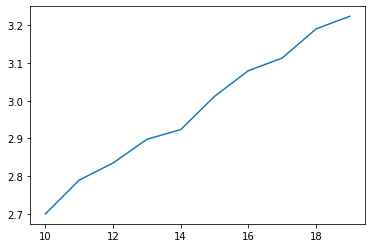

In [38]:
plt.plot(x,y)

In [39]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [40]:
slope

0.05783660606060609

In [41]:
intercept


2.1377052121212117

In [42]:
yy=[slope*u+intercept for u in x]


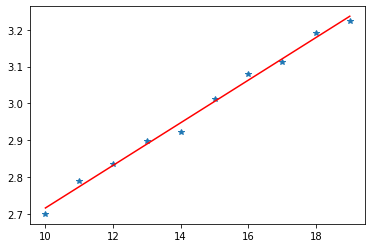

In [43]:
plt.show(plt.plot(x,y,'*',x,yy,'r-'))

# CONCLISION


Simulation de jeux lido avec un seul joueur S= longeur de chemin A= position du joueur NA=nombre du coups effectués le joueur reste sur sa potsition initiale jusqua la valeur de déé=6 puis il avance au position 1 et tant que sa position est inférieure au nombre de pas nécessaires s il relance le dé et incrémente le nombre de coup effectués si le valeur de déé + A > S le joueur n'avance pas mais le nombre de coup effectues va incrementer

la simulation nous permet d'avoir l'éspérance du sceanrio 10^5 et la nuage des points de la moyenne dans l'intervalle [10.20]

apres faire une simulation on a degager une formule mathematique sous la forme de ax+b
